In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re

/home/andres/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Remove all empty files
folder_path = '.'
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path) and os.path.getsize(file_path) < 5: # Less than 5 bytes
        os.remove(file_path)
        print(f'Deleted: {file_path}')

In [4]:
station_files = sorted(glob.glob('*.csv'))
station_files.remove('netatmo_stations.csv')
try:
    station_files.remove('temperatures.csv')
except:
    pass
try:
    station_files.remove('diff.csv')
except:
    pass
station_files

['70:ee:50:00:c9:6e.csv',
 '70:ee:50:00:ea:00.csv',
 '70:ee:50:01:33:6a.csv',
 '70:ee:50:02:e6:38.csv',
 '70:ee:50:03:d3:d8.csv',
 '70:ee:50:04:d9:6a.csv',
 '70:ee:50:04:f0:c2.csv',
 '70:ee:50:05:53:70.csv',
 '70:ee:50:12:69:86.csv',
 '70:ee:50:12:7e:fc.csv',
 '70:ee:50:12:ce:a6.csv',
 '70:ee:50:13:68:8e.csv',
 '70:ee:50:17:64:42.csv',
 '70:ee:50:1b:0f:34.csv',
 '70:ee:50:1e:05:66.csv',
 '70:ee:50:22:b4:1c.csv',
 '70:ee:50:28:8e:30.csv',
 '70:ee:50:28:ed:dc.csv',
 '70:ee:50:2b:15:26.csv',
 '70:ee:50:2b:5b:da.csv',
 '70:ee:50:2c:73:12.csv',
 '70:ee:50:2c:fe:4c.csv',
 '70:ee:50:2e:d0:4c.csv',
 '70:ee:50:2e:ec:20.csv',
 '70:ee:50:2f:28:5e.csv',
 '70:ee:50:37:22:1c.csv',
 '70:ee:50:3a:22:2c.csv',
 '70:ee:50:3f:22:b0.csv',
 '70:ee:50:58:ac:20.csv',
 '70:ee:50:5e:f5:44.csv',
 '70:ee:50:5e:fd:d8.csv',
 '70:ee:50:5f:29:bc.csv',
 '70:ee:50:65:19:62.csv',
 '70:ee:50:65:24:78.csv',
 '70:ee:50:71:22:fe.csv',
 '70:ee:50:71:2b:48.csv',
 '70:ee:50:71:49:30.csv',
 '70:ee:50:71:4d:2a.csv',
 '70:ee:50:7

In [5]:
#for csv_file in station_files:
df = pd.read_csv(station_files[0], delimiter=',')
df.head()

,date,time,temp
0,2023-05-31,21:00:37,19.6
1,2023-05-31,21:25:24,19.6
2,2023-05-31,21:40:47,19.6
3,2023-05-31,21:51:02,19.4
4,2023-05-31,22:06:25,19.2


In [6]:
df['time'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S')
df.head(10)

,date,time,temp
0,2023-05-31,2023-05-31 21:00:37,19.6
1,2023-05-31,2023-05-31 21:25:24,19.6
2,2023-05-31,2023-05-31 21:40:47,19.6
3,2023-05-31,2023-05-31 21:51:02,19.4
4,2023-05-31,2023-05-31 22:06:25,19.2
5,2023-05-31,2023-05-31 22:16:39,19.1
6,2023-05-31,2023-05-31 22:26:03,19.0
7,2023-05-31,2023-05-31 22:41:26,18.9
8,2023-05-31,2023-05-31 22:51:42,18.7
9,2023-05-31,2023-05-31 23:01:57,18.5


In [7]:
df['hour'] = df['time'].dt.hour
df.head(10)

,date,time,temp,hour
0,2023-05-31,2023-05-31 21:00:37,19.6,21
1,2023-05-31,2023-05-31 21:25:24,19.6,21
2,2023-05-31,2023-05-31 21:40:47,19.6,21
3,2023-05-31,2023-05-31 21:51:02,19.4,21
4,2023-05-31,2023-05-31 22:06:25,19.2,22
5,2023-05-31,2023-05-31 22:16:39,19.1,22
6,2023-05-31,2023-05-31 22:26:03,19.0,22
7,2023-05-31,2023-05-31 22:41:26,18.9,22
8,2023-05-31,2023-05-31 22:51:42,18.7,22
9,2023-05-31,2023-05-31 23:01:57,18.5,23


In [8]:
# For each hour, find the closest timestamp (either before or after)
def get_closest_hour(row, df):
    # Find all rows for the target hour and the next hour (or previous if needed)
    target_hour = row['hour']
    closest_row = df.iloc[(df['time'] - row['time']).abs().argmin()]
    return closest_row

# Apply the function to each row in the dataframe
closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))

# Convert the result back into a dataframe
result = closest_temps.reset_index(drop=True)[['date', 'time', 'temp']]
result.head(10)

/tmp/ipykernel_9662/710818299.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


,date,time,temp
0,2023-05-31,2023-05-31 21:00:37,19.6
1,2023-05-31,2023-05-31 22:06:25,19.2
2,2023-05-31,2023-05-31 23:01:57,18.5
3,2023-06-01,2023-06-01 00:06:53,18.0
4,2023-06-01,2023-06-01 01:17:48,17.3
5,2023-06-01,2023-06-01 02:08:12,17.1
6,2023-06-01,2023-06-01 03:08:53,16.9
7,2023-06-01,2023-06-01 04:09:32,16.6
8,2023-06-01,2023-06-01 05:05:04,16.4
9,2023-06-01,2023-06-01 06:00:36,16.4


In [9]:
result['time'] = result['time'].dt.hour
result.head()

,date,time,temp
0,2023-05-31,21,19.6
1,2023-05-31,22,19.2
2,2023-05-31,23,18.5
3,2023-06-01,0,18.0
4,2023-06-01,1,17.3


In [10]:
# Filter by date interval
start_date = '2023-06-01'
end_date = '2023-08-31'

result = result[(result['date'] >= start_date) & (result['date'] <= end_date)]
result.head()

,date,time,temp
3,2023-06-01,0,18.0
4,2023-06-01,1,17.3
5,2023-06-01,2,17.1
6,2023-06-01,3,16.9
7,2023-06-01,4,16.6


In [11]:
result.tail()

,date,time,temp
2128,2023-08-31,19,26.4
2129,2023-08-31,20,24.7
2130,2023-08-31,21,23.7
2131,2023-08-31,22,23.0
2132,2023-08-31,23,22.5


## Preprocess all stations

In [12]:
all_dataframes = []

In [13]:
# For each hour, find the closest timestamp (either before or after)
def get_closest_hour(row, df):
    # Find all rows for the target hour and the next hour (or previous if needed)
    target_hour = row['hour']
    closest_row = df.iloc[(df['time'] - row['time']).abs().argmin()]
    return closest_row

for csv_file in station_files:
    print(f'Processing {csv_file}')
    df = pd.read_csv(csv_file, delimiter=',')
    df['time'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S')
    df['hour'] = df['time'].dt.hour
    
    # Apply the function to each row in the dataframe
    closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))

    # Convert the result back into a dataframe
    result = closest_temps.reset_index(drop=True)[['date', 'time', 'temp']]

    # Get just the time
    result['time'] = result['time'].dt.hour
    
    # Filter by date interval
    start_date = '2023-06-01'
    end_date = '2023-08-31'
    result = result[(result['date'] >= start_date) & (result['date'] <= end_date)]
    #result['station'] = re.search(r"/([^/]+)\.csv$", csv_file).group(1)
    result['station'] = re.search(r"(.+)\.csv$", csv_file).group(1)

    all_dataframes.append(result)

Processing 70:ee:50:00:c9:6e.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:00:ea:00.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:01:33:6a.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:02:e6:38.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:03:d3:d8.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:04:d9:6a.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:04:f0:c2.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:05:53:70.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:12:69:86.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:12:7e:fc.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:12:ce:a6.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:13:68:8e.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:17:64:42.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:1b:0f:34.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:1e:05:66.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:22:b4:1c.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:28:8e:30.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:28:ed:dc.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2b:15:26.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2b:5b:da.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2c:73:12.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2c:fe:4c.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2e:d0:4c.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2e:ec:20.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2f:28:5e.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:37:22:1c.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:3a:22:2c.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:3f:22:b0.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:58:ac:20.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:5e:f5:44.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:5e:fd:d8.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:5f:29:bc.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:65:19:62.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:65:24:78.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:71:22:fe.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:71:2b:48.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:71:49:30.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:71:4d:2a.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7a:93:7c.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7a:e8:5c.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7f:a7:00.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7f:b5:f2.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7f:ba:40.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:83:8c:58.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:96:a9:8a.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:96:b2:22.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:a2:16:44.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:a2:20:c2.csv


/tmp/ipykernel_9662/2686556054.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


In [14]:
all_dataframes[0]

,date,time,temp,station
3,2023-06-01,0,18.0,70:ee:50:00:c9:6e
4,2023-06-01,1,17.3,70:ee:50:00:c9:6e
5,2023-06-01,2,17.1,70:ee:50:00:c9:6e
6,2023-06-01,3,16.9,70:ee:50:00:c9:6e
7,2023-06-01,4,16.6,70:ee:50:00:c9:6e
...,...,...,...,...
2128,2023-08-31,19,26.4,70:ee:50:00:c9:6e
2129,2023-08-31,20,24.7,70:ee:50:00:c9:6e
2130,2023-08-31,21,23.7,70:ee:50:00:c9:6e
2131,2023-08-31,22,23.0,70:ee:50:00:c9:6e


In [15]:
temperatures = pd.concat(all_dataframes, ignore_index=True)
temperatures.head()

,date,time,temp,station
0,2023-06-01,0,18.0,70:ee:50:00:c9:6e
1,2023-06-01,1,17.3,70:ee:50:00:c9:6e
2,2023-06-01,2,17.1,70:ee:50:00:c9:6e
3,2023-06-01,3,16.9,70:ee:50:00:c9:6e
4,2023-06-01,4,16.6,70:ee:50:00:c9:6e


In [16]:
temperatures.tail()

,date,time,temp,station
101117,2023-08-31,19,19.9,70:ee:50:a2:20:c2
101118,2023-08-31,20,19.4,70:ee:50:a2:20:c2
101119,2023-08-31,21,19.3,70:ee:50:a2:20:c2
101120,2023-08-31,22,19.3,70:ee:50:a2:20:c2
101121,2023-08-31,23,19.2,70:ee:50:a2:20:c2


In [17]:
temperatures.to_csv('temperatures.csv', index=False)

## Quality Control

Baseline defined in the paper "Citizen data for global mapping of atmospheric urban heat islands"

In [17]:
temperatures.shape

(75624, 4)

In [18]:
# Remove values below -20ºC and above 45ºC
temperatures = temperatures[(temperatures['temp'] >= -20) & (temperatures['temp'] <= 45)]
temperatures.shape

(75553, 4)

In [19]:
# Keep only rows where the temperature difference is within ±thresholdºC
threshold = 10
# Define a function to filter each station's data
def filter_station_data(station_df):
    station_df = station_df.copy()  # Avoid modifying the original dataframe
    station_df['temp_diff_prev'] = station_df['temp'].diff()
    station_df['temp_diff_next'] = station_df['temp'].diff(-1)
    
    # Keep only rows where the temperature difference is within ±thresholdºC
    filtered = station_df[(station_df['temp_diff_prev'].abs() <= threshold) & (station_df['temp_diff_next'].abs() <= threshold)]
    
    return filtered.drop(columns=["temp_diff_prev", "temp_diff_next"])

# Apply filtering per station
temperatures = temperatures.groupby("station", group_keys=False).apply(filter_station_data)
temperatures.shape

/tmp/ipykernel_133345/3283187688.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temperatures = temperatures.groupby("station", group_keys=False).apply(filter_station_data)


(75397, 4)

In [20]:
# Detect outliers checking the data distribution using z-score

# Group by date and time, then compute the mean and standard deviation of temp
grouped = temperatures.groupby(['date', 'time'])['temp'].agg(['mean', 'std'])

# Merge the mean and std back to the original dataframe
temperatures = temperatures.merge(grouped, on=['date', 'time'])

# Compute the Z-score
temperatures['z_score'] = (temperatures['temp'] - temperatures['mean']) / temperatures['std']

# Remove rows where the z-score value is outside the range between -2.32 and 1.64
temperatures = temperatures[(temperatures['z_score'].abs() >= -2.32) & ((temperatures['z_score'].abs() <= 1.64))]
temperatures.shape

(71749, 7)

In [21]:
# Remove unnecessary columns
temperatures = temperatures.drop(columns=['z_score', 'mean', 'std'])
temperatures

,date,time,temp,station
0,2023-06-01,1,22.2,70:ee:50:01:d9:c2
1,2023-06-01,2,21.7,70:ee:50:01:d9:c2
2,2023-06-01,3,21.3,70:ee:50:01:d9:c2
3,2023-06-01,4,21.1,70:ee:50:01:d9:c2
4,2023-06-01,5,20.8,70:ee:50:01:d9:c2
...,...,...,...,...
75392,2023-08-31,18,31.9,70:ee:50:a4:5c:32
75393,2023-08-31,19,30.9,70:ee:50:a4:5c:32
75394,2023-08-31,20,29.6,70:ee:50:a4:5c:32
75395,2023-08-31,21,28.8,70:ee:50:a4:5c:32


## Compute temperature differences

In [18]:
ref_stations = [
    '70:ee:50:2b:5b:da', # Villamar
    '70:ee:50:5e:f5:44'
]

In [19]:
# Merge the dataframe with itself to compute the difference with the reference station
#df_ref = temperatures[temperatures['station'] == '70:ee:50:7a:d1:ce'][['date', 'time', 'temp']].rename(columns={'temp': 'temp_ref'})
df_ref = (
    temperatures[temperatures['station'].isin(ref_stations)]
    .groupby(['date', 'time'])['temp']
    .mean()
    .reset_index()
    .rename(columns={'temp': 'temp_ref'})
)
df_merged = pd.merge(temperatures, df_ref, on=['date', 'time'])
df_merged

,date,time,temp,station,temp_ref
0,2023-06-01,0,18.0,70:ee:50:00:c9:6e,17.55
1,2023-06-01,1,17.3,70:ee:50:00:c9:6e,17.35
2,2023-06-01,2,17.1,70:ee:50:00:c9:6e,17.30
3,2023-06-01,3,16.9,70:ee:50:00:c9:6e,17.10
4,2023-06-01,4,16.6,70:ee:50:00:c9:6e,16.95
...,...,...,...,...,...
101117,2023-08-31,19,19.9,70:ee:50:a2:20:c2,20.65
101118,2023-08-31,20,19.4,70:ee:50:a2:20:c2,20.35
101119,2023-08-31,21,19.3,70:ee:50:a2:20:c2,20.45
101120,2023-08-31,22,19.3,70:ee:50:a2:20:c2,20.30


In [20]:
# Compute the daily temperature difference from reference station for each station
df_merged['temp_diff'] = df_merged['temp'] - df_merged['temp_ref']
df_merged

,date,time,temp,station,temp_ref,temp_diff
0,2023-06-01,0,18.0,70:ee:50:00:c9:6e,17.55,0.45
1,2023-06-01,1,17.3,70:ee:50:00:c9:6e,17.35,-0.05
2,2023-06-01,2,17.1,70:ee:50:00:c9:6e,17.30,-0.20
3,2023-06-01,3,16.9,70:ee:50:00:c9:6e,17.10,-0.20
4,2023-06-01,4,16.6,70:ee:50:00:c9:6e,16.95,-0.35
...,...,...,...,...,...,...
101117,2023-08-31,19,19.9,70:ee:50:a2:20:c2,20.65,-0.75
101118,2023-08-31,20,19.4,70:ee:50:a2:20:c2,20.35,-0.95
101119,2023-08-31,21,19.3,70:ee:50:a2:20:c2,20.45,-1.15
101120,2023-08-31,22,19.3,70:ee:50:a2:20:c2,20.30,-1.00


In [21]:
#df_merged.to_csv('df_merged.csv')

In [22]:
#threshold = 5
#df_filtered = df_merged[(df_merged['temp_diff'] >= -threshold) & (df_merged['temp_diff'] <= threshold)]
df_filtered = df_merged

In [23]:
# Remove rows where 'station' is in the list
df_filtered = df_filtered[~df_filtered['station'].isin(ref_stations)]

In [24]:
df_filtered

,date,time,temp,station,temp_ref,temp_diff
0,2023-06-01,0,18.0,70:ee:50:00:c9:6e,17.55,0.45
1,2023-06-01,1,17.3,70:ee:50:00:c9:6e,17.35,-0.05
2,2023-06-01,2,17.1,70:ee:50:00:c9:6e,17.30,-0.20
3,2023-06-01,3,16.9,70:ee:50:00:c9:6e,17.10,-0.20
4,2023-06-01,4,16.6,70:ee:50:00:c9:6e,16.95,-0.35
...,...,...,...,...,...,...
101117,2023-08-31,19,19.9,70:ee:50:a2:20:c2,20.65,-0.75
101118,2023-08-31,20,19.4,70:ee:50:a2:20:c2,20.35,-0.95
101119,2023-08-31,21,19.3,70:ee:50:a2:20:c2,20.45,-1.15
101120,2023-08-31,22,19.3,70:ee:50:a2:20:c2,20.30,-1.00


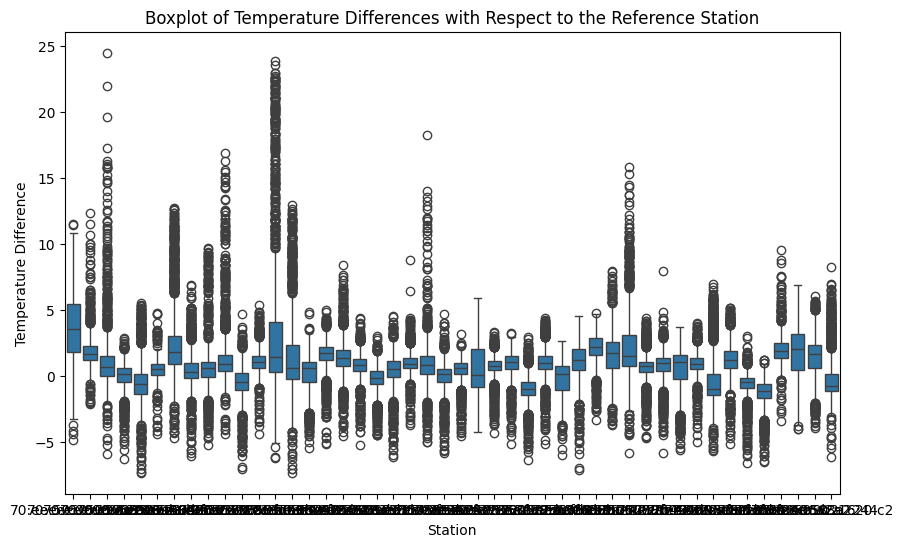

In [25]:
# Create a boxplot for each station showing the temperature differences
plt.figure(figsize=(10, 6))
sns.boxplot(x='station', y='temp_diff', data=df_filtered)

plt.title('Boxplot of Temperature Differences with Respect to the Reference Station')
plt.xlabel('Station')
plt.ylabel('Temperature Difference')

plt.show()

In [26]:
df_merged['temp'].max()

53.6

In [27]:
# Compute mean
df_filtered = df_filtered.groupby('station')['temp_diff'].mean().reset_index()
df_filtered

,station,temp_diff
0,70:ee:50:00:c9:6e,3.734319
1,70:ee:50:00:ea:00,1.854574
2,70:ee:50:01:33:6a,1.204116
3,70:ee:50:02:e6:38,0.006159
4,70:ee:50:03:d3:d8,-0.472237
5,70:ee:50:04:d9:6a,0.508855
6,70:ee:50:04:f0:c2,2.398188
7,70:ee:50:05:53:70,0.476766
8,70:ee:50:12:69:86,0.612620
9,70:ee:50:12:7e:fc,1.410960


## Add coordinates

In [28]:
stations = pd.read_csv('netatmo_stations.csv')
stations

,device_id,module_id,lon,lat
0,70:ee:50:af:48:36,02:00:00:af:97:b6,-5.821514,43.380573
1,70:ee:50:12:ce:a6,02:00:00:12:ba:e6,-5.821986,43.381939
2,70:ee:50:a2:20:c2,02:00:00:a2:03:0c,-5.816930,43.378882
3,70:ee:50:71:49:30,02:00:00:71:4b:f2,-5.811817,43.377968
4,70:ee:50:90:d8:82,02:00:00:ab:de:78,-5.804601,43.379862
...,...,...,...,...
58,70:ee:50:71:2b:48,02:00:00:71:2f:f6,-5.837338,43.369661
59,70:ee:50:b5:14:de,02:00:00:b5:0c:70,-5.829638,43.371635
60,70:ee:50:58:ac:20,02:00:00:58:b5:24,-6.005197,43.322529
61,70:ee:50:17:e6:4e,02:00:00:17:ef:7a,-5.975623,43.348381


In [29]:
stations = stations.drop(columns=['module_id'])
stations

,device_id,lon,lat
0,70:ee:50:af:48:36,-5.821514,43.380573
1,70:ee:50:12:ce:a6,-5.821986,43.381939
2,70:ee:50:a2:20:c2,-5.816930,43.378882
3,70:ee:50:71:49:30,-5.811817,43.377968
4,70:ee:50:90:d8:82,-5.804601,43.379862
...,...,...,...
58,70:ee:50:71:2b:48,-5.837338,43.369661
59,70:ee:50:b5:14:de,-5.829638,43.371635
60,70:ee:50:58:ac:20,-6.005197,43.322529
61,70:ee:50:17:e6:4e,-5.975623,43.348381


In [30]:
data = pd.merge(df_filtered, stations, left_on='station', right_on='device_id')
data.head()

,station,temp_diff,device_id,lon,lat
0,70:ee:50:00:c9:6e,3.734319,70:ee:50:00:c9:6e,-5.849700,43.361700
1,70:ee:50:00:ea:00,1.854574,70:ee:50:00:ea:00,-5.866472,43.368765
2,70:ee:50:01:33:6a,1.204116,70:ee:50:01:33:6a,-5.847184,43.360374
3,70:ee:50:02:e6:38,0.006159,70:ee:50:02:e6:38,-5.816177,43.441605
4,70:ee:50:03:d3:d8,-0.472237,70:ee:50:03:d3:d8,-5.773827,43.440124


In [31]:
data = data.drop(columns=['device_id'])
data.head()

,station,temp_diff,lon,lat
0,70:ee:50:00:c9:6e,3.734319,-5.849700,43.361700
1,70:ee:50:00:ea:00,1.854574,-5.866472,43.368765
2,70:ee:50:01:33:6a,1.204116,-5.847184,43.360374
3,70:ee:50:02:e6:38,0.006159,-5.816177,43.441605
4,70:ee:50:03:d3:d8,-0.472237,-5.773827,43.440124


In [32]:
data.to_csv('diff.csv', index=False)